In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import cv2

In [2]:
o1 = plt.imread('Flower/act14-flowerPhase0.png')
o2 = plt.imread('Flower/act14-flowerPhase90.png')
o3 = plt.imread('Flower/act14-flowerPhase180.png')
o4 = plt.imread('Flower/act14-flowerPhase270.png')

b1 = plt.imread('Flower/act14-Phase0.png')
b2 = plt.imread('Flower/act14-Phase90.png')
b3 = plt.imread('Flower/act14-Phase180.png')
b4 = plt.imread('Flower/act14-Phase270.png')

In [3]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [4]:
O1 = rgb2gray(o1)
O2 = rgb2gray(o2)
O3 = rgb2gray(o3)
O4 = rgb2gray(o4)

B1 = rgb2gray(b1)
B2 = rgb2gray(b2)
B3 = rgb2gray(b3)
B4 = rgb2gray(b4)

In [5]:
def transform_perspective(image):
    '''
    code from: https://www.geeksforgeeks.org/perspective-transformation-python-opencv/
    '''
    pts1 = np.float32([[575, 342], [1080, 245], [550, 860], [1110, 854]])
    pts2 = np.float32([[0, 0], [500, 0], [0, 500], [500, 500]])
    
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(image, matrix, (500, 500))
    
    return result

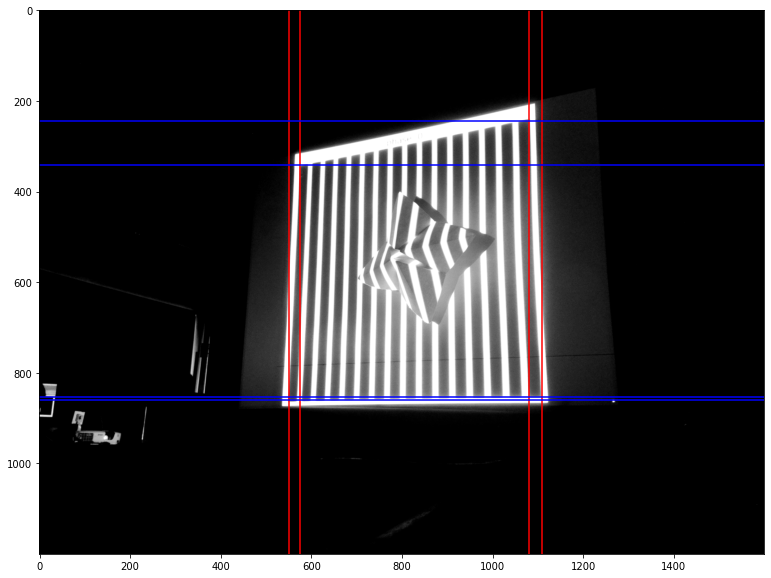

In [6]:
plt.figure(figsize = (30,10))
plt.imshow(O1, cmap = 'gray')
plt.axvline(x = 550, color = 'red')
plt.axvline(x = 575, color = 'red')

plt.axvline(x = 1080, color = 'red')
plt.axvline(x = 1110, color = 'red')

plt.axhline(y = 245, color = 'blue')
plt.axhline(y = 342, color = 'blue')

plt.axhline(y = 860, color = 'blue')
plt.axhline(y = 854, color = 'blue')
plt.show()

### Cropping Object First (Removing Black Area)

In [7]:
J1 = transform_perspective(O1)
J2 = transform_perspective(O2)
J3 = transform_perspective(O3)
J4 = transform_perspective(O4)

BG1 = transform_perspective(B1)
BG2 = transform_perspective(B2)
BG3 = transform_perspective(B3)
BG4 = transform_perspective(B4)

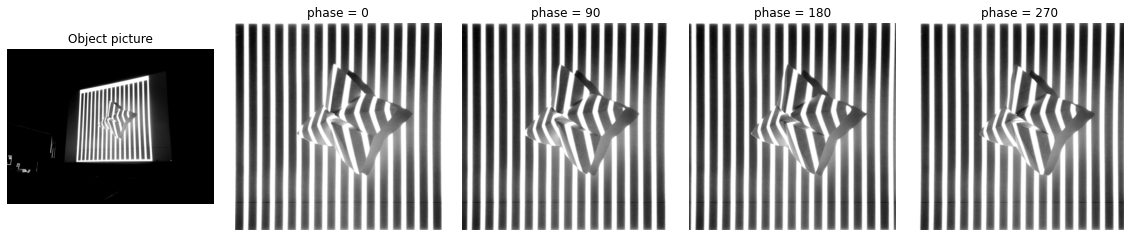

In [9]:
plt.figure(figsize = (20,8))
plt.subplot(151)
plt.imshow(O1, cmap='gray')
plt.axis('off')
plt.title('Object picture')

plt.subplot(152)
plt.imshow(J1, cmap='gray')
plt.axis('off')
plt.title('phase = 0')

plt.subplot(153)
plt.imshow(J2, cmap='gray')
plt.axis('off')
plt.title('phase = 90')

plt.subplot(154)
plt.imshow(J3, cmap='gray')
plt.axis('off')
plt.title('phase = 180')

plt.subplot(155)
plt.imshow(J4, cmap='gray')
plt.axis('off')
plt.title('phase = 270')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('Figures/flower_object.png', dpi = 300, bbox_inches = 'tight')
plt.show()

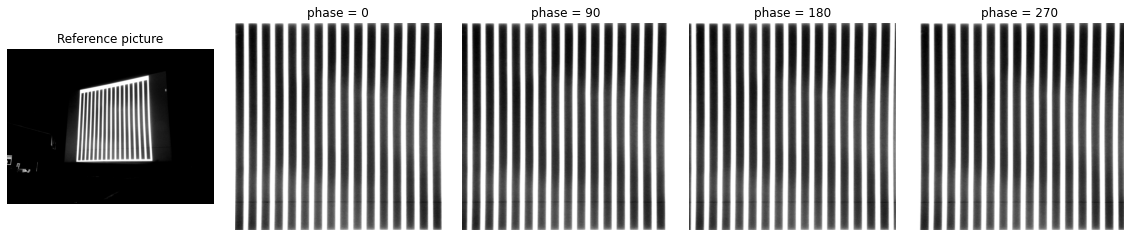

In [10]:
plt.figure(figsize = (20,8))
plt.subplot(151)
plt.imshow(B1, cmap='gray')
plt.axis('off')
plt.title('Reference picture')

plt.subplot(152)
plt.imshow(BG1, cmap='gray')
plt.axis('off')
plt.title('phase = 0')

plt.subplot(153)
plt.imshow(BG2, cmap='gray')
plt.axis('off')
plt.title('phase = 90')

plt.subplot(154)
plt.imshow(BG3, cmap='gray')
plt.axis('off')
plt.title('phase = 180')

plt.subplot(155)
plt.imshow(BG4, cmap='gray')
plt.axis('off')
plt.title('phase = 270')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('Figures/flower_reference.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Phase Calculation, Wrapping, and Unwrapping

In [12]:
def calculate_phase(I1,I2,I3,I4):
    N = I4 - I2
    D = I1 - I3
    phase = np.arctan2(N,D).astype(float)
    return phase

In [13]:
def calculate_phase_with_modulation(I1,I2,I3,I4):
    I = []
    phi = [0, np.pi/2, np.pi, 1.5*np.pi]
    I = [np.mean(I1) + I1 * np.cos(phi[0]), np.mean(I2) - I2 * np.sin(phi[1]), np.mean(I3) - I3 * np.cos(phi[2]), np.mean(I4) + I4 * np.sin(phi[3])]
    
    N = I[3] - I[1]
    D = I[0] - I[2]
    phase = np.arctan2(N,D).astype(float)
    return phase

In [14]:
phase_obj = calculate_phase_with_modulation(J1, J2, J3, J4)
phase_ref = calculate_phase_with_modulation(BG1, BG2, BG3, BG4)

In [15]:
Z_obj = np.unwrap(np.unwrap(phase_obj, axis = 1), axis = 0)
Z_ref = np.unwrap(np.unwrap(phase_ref, axis = 1), axis = 0)

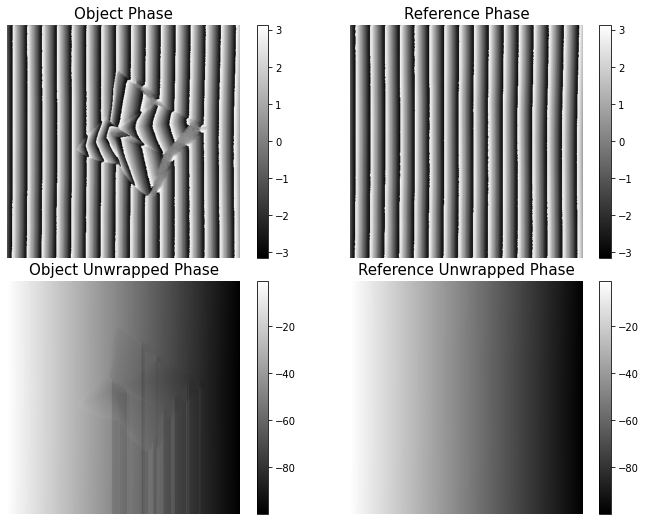

In [16]:
plt.figure(figsize = (8*1.5,6*1.5))
plt.subplot(221)
plt.imshow(phase_obj, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Object Phase', fontsize = 15)

plt.subplot(222)
plt.imshow(phase_ref, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Reference Phase', fontsize = 15)

plt.subplot(223)
plt.imshow(Z_obj, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Object Unwrapped Phase', fontsize = 15)

plt.subplot(224)
plt.imshow(Z_ref, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Reference Unwrapped Phase', fontsize = 15)

plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig('Figures/flower_phase_wrap_unwrap.png', dpi = 300, bbox_inches = 'tight')
plt.show()

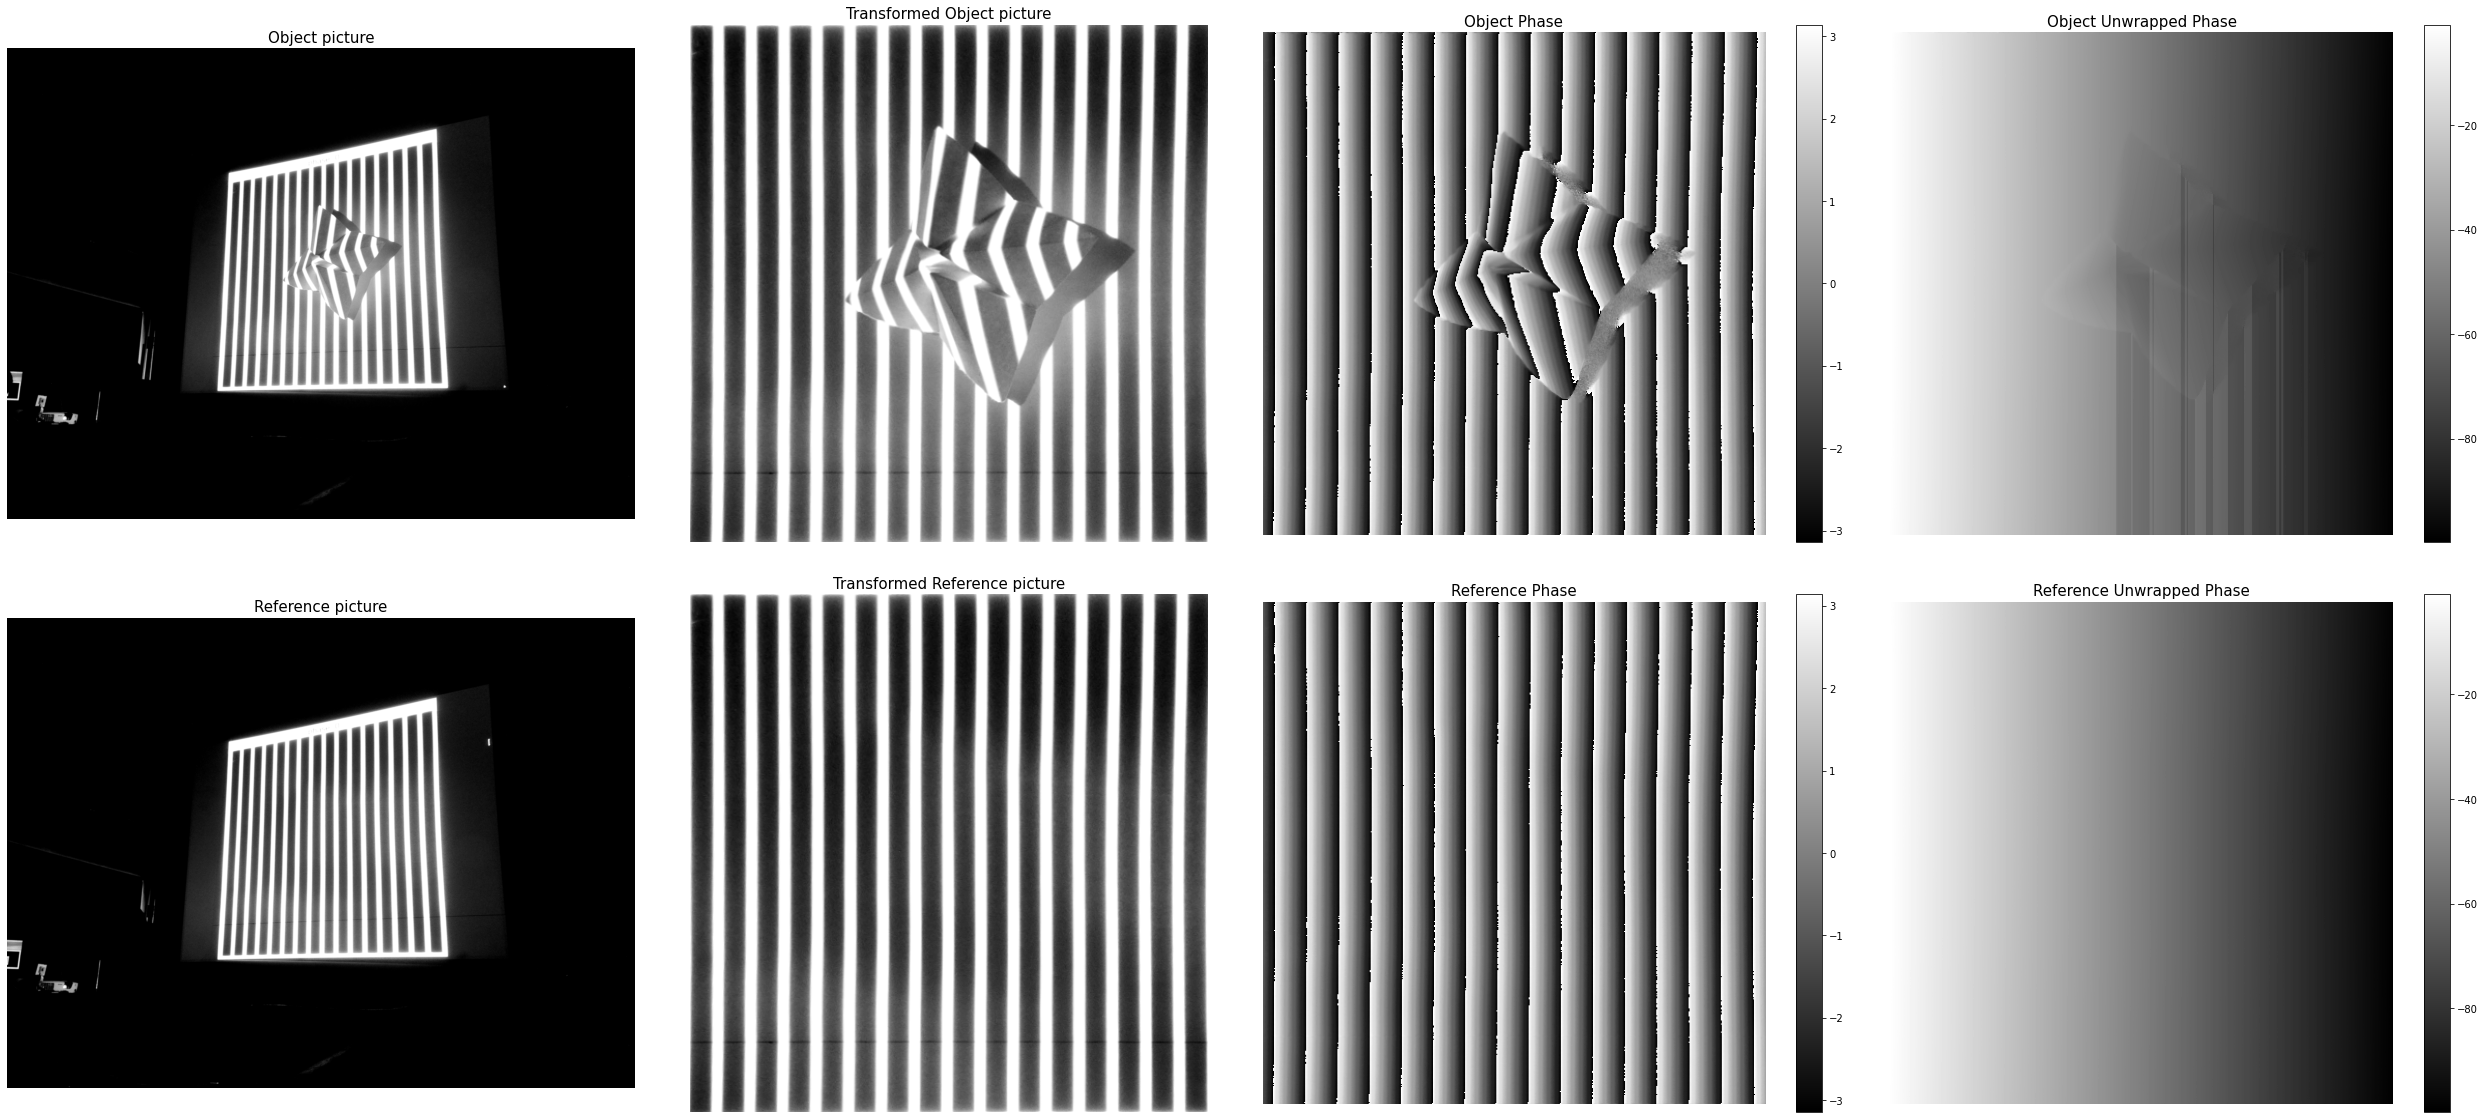

In [23]:
plt.figure(figsize = (45,20))
plt.subplot(241)
plt.imshow(O1, cmap='gray')
plt.axis('off')
plt.title('Object picture', fontsize = 15)

plt.subplot(245)
plt.imshow(B1, cmap='gray')
plt.axis('off')
plt.title('Reference picture', fontsize = 15)

plt.subplot(242)
plt.imshow(J1, cmap='gray')
plt.axis('off')
plt.title('Transformed Object picture', fontsize = 15)

plt.subplot(246)
plt.imshow(BG1, cmap='gray')
plt.axis('off')
plt.title('Transformed Reference picture', fontsize = 15)

plt.subplot(243)
plt.imshow(phase_obj, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Object Phase', fontsize = 15)

plt.subplot(247)
plt.imshow(phase_ref, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Reference Phase', fontsize = 15)

plt.subplot(244)
plt.imshow(Z_obj, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Object Unwrapped Phase', fontsize = 15)

plt.subplot(248)
plt.imshow(Z_ref, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.title('Reference Unwrapped Phase', fontsize = 15)


plt.subplots_adjust(wspace=0.0, hspace=0.1)
plt.savefig('Figures/flowers.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Object Reconstruction

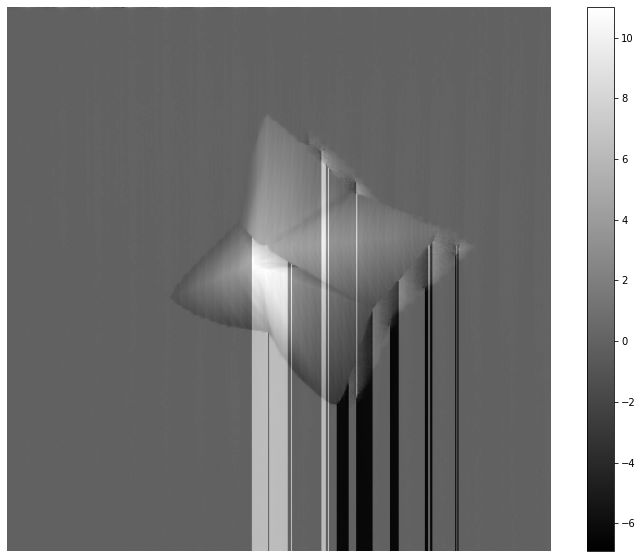

In [24]:
recons = Z_ref - Z_obj

plt.figure(figsize = (13, 10))
plt.imshow(recons, cmap = 'gray')
plt.colorbar()
plt.axis('off')
plt.savefig('Figures/flower_recons_2D.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [66]:
recons.shape

(500, 500)

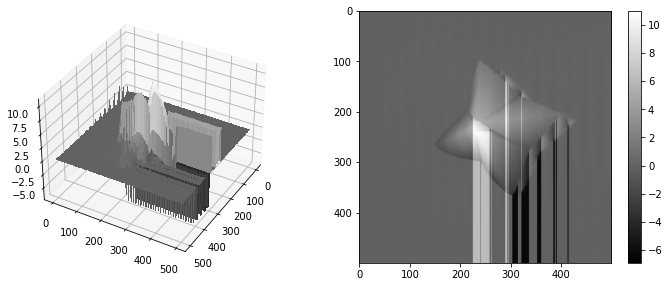

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0, recons.shape[0], 1)
y = np.arange(0, recons.shape[1], 1)

X, Y = np.meshgrid(x,y)
Z = recons

mappable = plt.cm.ScalarMappable(cmap=plt.cm.gray)
mappable.set_array(Z)

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
ax1.view_init(elev= 35, azim = 30)

ax2 = fig.add_subplot(122)
ax2.imshow(Z, cmap=mappable.cmap, norm=mappable.norm)

plt.colorbar(mappable)
plt.savefig('Figures/flower_recons.png', dpi = 300, bbox_inches = 'tight')
plt.tight_layout()

### Apply Fourier Filtering to make the quality of reconstructed image better

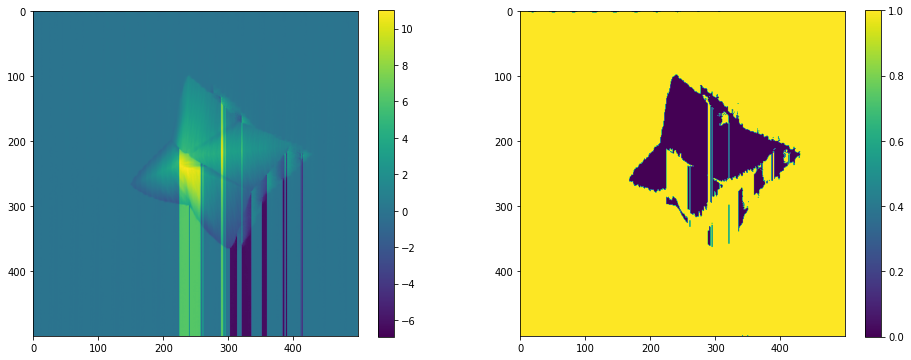

In [260]:
plt.figure(figsize = (16,6))

plt.subplot(121)
plt.imshow(img)
plt.colorbar()

plt.subplot(122)
plt.imshow((img < 0.2) | (img > 5))
plt.colorbar()
plt.show()

In [233]:
mask = (img < 0.19) | (img > 5)  * 1
mask[0:50,] = 1
a = (np.where((mask==0)|(mask==1), mask^1, mask) * 255).astype('uint8')

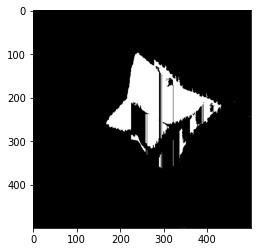

In [234]:
plt.imshow(a, cmap = 'gray')

In [235]:
a.dtype

dtype('uint8')

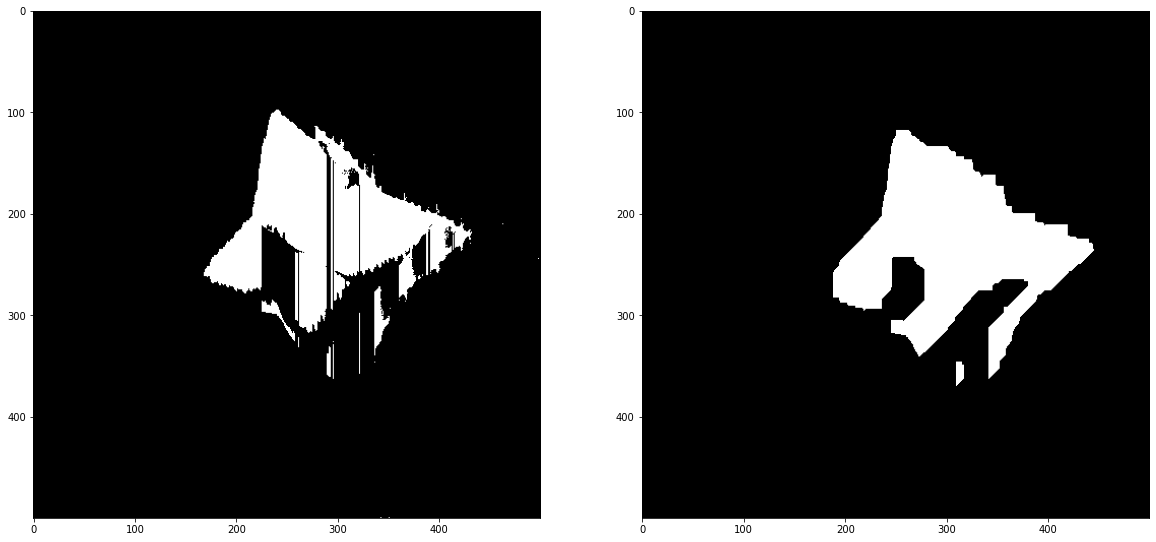

In [244]:
thresh = a.copy()
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
thresh = cv2.dilate(thresh, ellipse, iterations = 1)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, ellipse, iterations = 20)

plt.figure(figsize = (20,10))
plt.subplot(121)
plt.imshow(a, cmap = 'gray')
plt.subplot(122)
plt.imshow(thresh, cmap = 'gray')

In [248]:
new_mask = thresh/255
c1 = recons * new_mask

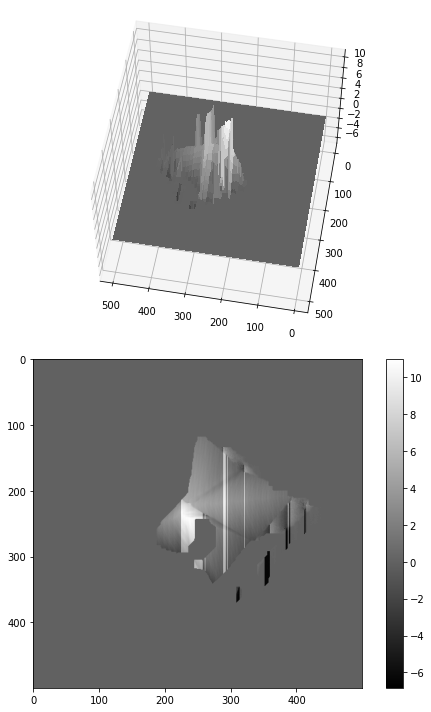

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0, recons.shape[0], 1)
y = np.arange(0, recons.shape[1], 1)

X, Y = np.meshgrid(x,y)
Z = c1

mappable = plt.cm.ScalarMappable(cmap=plt.cm.gray)
mappable.set_array(Z)

fig = plt.figure(figsize=(7,10))

ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
ax1.view_init(elev= 55, azim = 100)

ax2 = fig.add_subplot(212)
ax2.imshow(Z, cmap=mappable.cmap, norm=mappable.norm)

plt.colorbar(mappable)
plt.savefig('Figures/flower_recons_fft.png', dpi = 300, bbox_inches = 'tight')
plt.tight_layout()

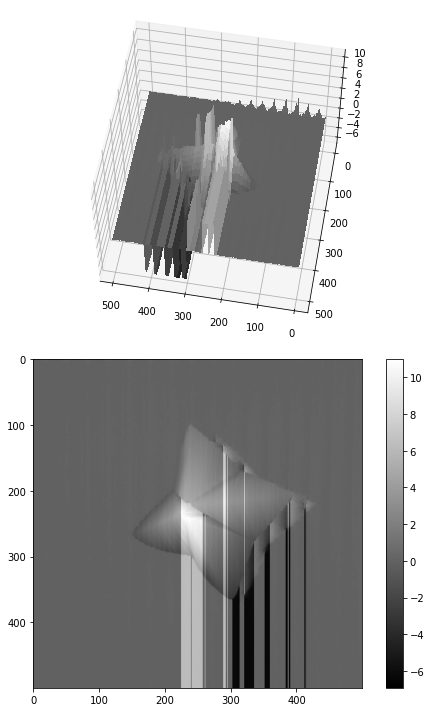

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0, recons.shape[0], 1)
y = np.arange(0, recons.shape[1], 1)

X, Y = np.meshgrid(x,y)
Z = recons

mappable = plt.cm.ScalarMappable(cmap=plt.cm.gray)
mappable.set_array(Z)

fig = plt.figure(figsize=(7,10))

ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
ax1.view_init(elev= 55, azim = 100)

ax2 = fig.add_subplot(212)
ax2.imshow(Z, cmap=mappable.cmap, norm=mappable.norm)

plt.colorbar(mappable)
plt.savefig('Figures/flower_recons_orig.png', dpi = 300, bbox_inches = 'tight')
plt.tight_layout()